In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install efficientnet

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import efficientnet.keras as efn
#from tensorflow.keras.applications import ResNet50

# Define paths to your train and test directories
train_dir = '/content/drive/MyDrive/sip/data/train'
test_dir = '/content/drive/MyDrive/sip/data/test'

# Set the input size for the model (e.g., VGG16)
input_size = (224,224)

# Create an ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create data generators for training and testing data
batch_size = 32  # Adjust as needed
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary'  # Set to 'categorical' if more than two classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='binary'  # Set to 'categorical' if more than two classes
)

# Load the pre-trained model (e.g., VGG16)
pretrained_model =  efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))

# Load the pre-trained model (e.g., VGG16)
pretrained_model =  efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))

# Add custom classification layers
model = keras.Sequential()
model.add(pretrained_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))  # Binary classification, so use 'sigmoid'


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs =3# Adjust as needed
history=model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Save the model for future use
model.save('your_model.h5')


Found 1389 images belonging to 2 classes.
Found 616 images belonging to 2 classes.
Epoch 1/3
44/44 [==============================] - 76s 715ms/step - loss: 0.2036 - accuracy: 0.9683 - val_loss: 21.3709 - val_accuracy: 0.7987
Epoch 2/3
44/44 [==============================] - 29s 653ms/step - loss: 0.2132 - accuracy: 0.9849 - val_loss: 5.7665 - val_accuracy: 0.9091
Epoch 3/3
44/44 [==============================] - 29s 655ms/step - loss: 0.0655 - accuracy: 0.9942 - val_loss: 0.0436 - val_accuracy: 0.9968


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


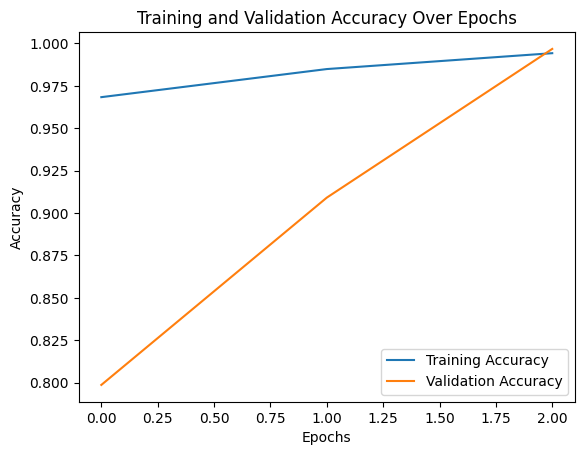

In [4]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()

In [5]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

20/20 [==============================] - 3s 155ms/step - loss: 0.0436 - accuracy: 0.9968
Test Accuracy: 99.68%


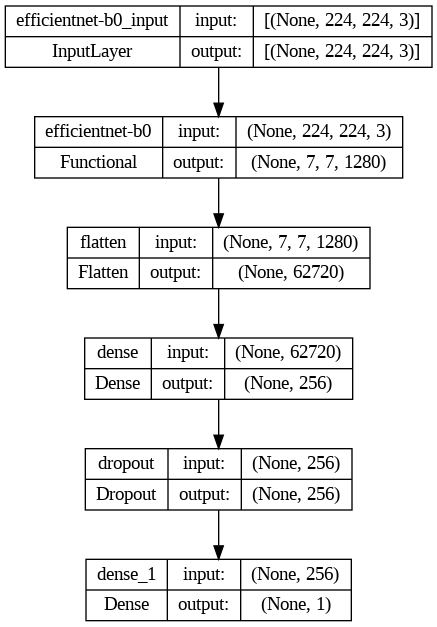

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)